<a href="https://colab.research.google.com/github/Gcango/Analise_Exploratorio_dos_Dados_da_TopSeles/blob/main/Analise_Exploratoria_TopSeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Este é um desafio Adaptado, cujo objectivo é a exploração dos dados com base nos parametros de analise de dados.

Problema: ToSeles é uma empresa de vendas, pretende fazer uma analise exploratória dos seus dados no periodo de 2020 e 2021. Para tal empreitada o grupo de gestores da TOPSELES definiu algumas questões encontradas no desenrolar deste documento.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv("/content/sales.csv", low_memory=False)

In [4]:
dados.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571.0,South,jwtitus,0.0


In [7]:
dados.tail(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
254244,100522253,2021-06-09,received,839857.0,APPORI59D49C6E937AB,1.0,384.0,0.0,0.000,0.000,...,397-33-9122,236-640-5516,Arcola,Loudoun,Arcola,VA,20107.0,South,mhcomstock,9.000000
254245,100522253,2021-06-09,received,839858.0,MATARO5AD9887010FCC,11.0,19.9,199.0,0.000,199.000,...,397-33-9122,236-640-5516,Arcola,Loudoun,Arcola,VA,20107.0,South,mhcomstock,0.000000
254246,100522258,2021-06-09,received,839864.0,ENTECO5A0C00E345122,2.0,2039.9,2039.9,206.341,1833.559,...,320-11-8050,252-848-1929,Robersonville,Martin,Robersonville,NC,27871.0,South,ecingersoll,10.115251
254247,100522259,2021-06-09,received,839865.0,ENTECO5A0C00E345122,2.0,2039.9,2039.9,206.341,1833.559,...,320-11-8050,252-848-1929,Robersonville,Martin,Robersonville,NC,27871.0,South,ecingersoll,10.115251
254248,100522260,2021-06-09,cancele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254249 entries, 0 to 254248
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          254249 non-null  object 
 1   order_date        254249 non-null  object 
 2   status            254249 non-null  object 
 3   item_id           254248 non-null  float64
 4   sku               254248 non-null  object 
 5   qty_ordered       254248 non-null  float64
 6   price             254248 non-null  float64
 7   value             254248 non-null  float64
 8   discount_amount   254248 non-null  float64
 9   total             254248 non-null  float64
 10  category          254248 non-null  object 
 11  payment_method    254248 non-null  object 
 12  bi_st             254248 non-null  object 
 13  cust_id           254248 non-null  float64
 14  year              254248 non-null  float64
 15  month             254248 non-null  object 
 16  ref_num           25

In [8]:
print(f" Esta Base de dados contem {dados.shape[0]} linhas e {dados.shape[1]} ")

 Esta Base de dados contem 254249 linhas e 36 


In [9]:
#Exibição das colunas por completo
pd.set_option('display.max_columns', None)
dados.sample(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
20919,100357808,2020-10-17,canceled,580383.0,MATSAM59B7E8D3E0A3E,2.0,1374.2,1374.2,200.000,1174.200,Mobiles & Tablets,Easypay,Gross,56519.0,2020.0,Oct-2020,751813.0,Mr.,Thaddeus,V,Brinker,M,31.0,"Brinker, Thaddeus",thaddeus.brinker@gmail.com,4/14/1997,494-29-0125,262-586-9401,Minocqua,Oneida,Minocqua,WI,54548.0,Midwest,tvbrinker,14.553922
77417,100488493,2021-04-26,received,796337.0,WOFSIT5AA20BB431F95,2.0,138.0,138.0,0.000,138.000,Women's Fashion,cod,Valid,66722.0,2021.0,Apr-2021,342255.0,Mr.,Rex,D,Halvorsen,M,40.0,"Halvorsen, Rex",rex.halvorsen@gmail.com,12/26/1997,533-71-8566,203-944-4786,Baltic,New London,Baltic,CT,6330.0,Northeast,rdhalvorsen,0.000000
63676,100526175,2021-06-13,canceled,845437.0,WOFGUL59AD7C9D05C2D,2.0,333.2,333.2,42.496,290.704,Women's Fashion,Easypay,Gross,59310.0,2021.0,Jun-2021,819298.0,Hon.,Maya,P,Noland,F,51.0,"Noland, Maya",maya.noland@bellsouth.net,6/8/2013,548-99-5694,216-384-8785,Cincinnati,Hamilton,Cincinnati,OH,45262.0,Midwest,mpnoland,12.753902
115545,100399545,2020-12-23,complete,650550.0,APPGAB59F8AEE1E5325,2.0,466.0,466.0,64.600,401.400,Appliances,easypay_voucher,Net,72654.0,2020.0,Dec-2020,150171.0,Mrs.,Kathlene,O,Muhammad,F,73.0,"Muhammad, Kathlene",kathlene.muhammad@sbcglobal.net,1/11/2014,105-02-3499,303-255-1377,Hoehne,Las Animas,Hoehne,CO,81046.0,West,komuhammad,13.862661
188972,100453462,2021-03-20,complete,745988.0,MEFISL5A796CA363112-S,2.0,149.9,149.9,0.000,149.900,Men's Fashion,cod,Net,87944.0,2021.0,Mar-2021,214699.0,Dr.,Davis,V,Mccoy,M,73.0,"Mccoy, Davis",davis.mccoy@yahoo.com,9/17/1988,143-23-7832,229-822-3767,Pine Mountain Valley,Harris,Pine Mountain Valley,GA,31823.0,South,dvmccoy,0.000000


In [10]:
dados.isnull().sum()

order_id            0
order_date          0
status              0
item_id             1
sku                 1
qty_ordered         1
price               1
value               1
discount_amount     1
total               1
category            1
payment_method      1
bi_st               1
cust_id             1
year                1
month               1
ref_num             1
Name Prefix         1
First Name          1
Middle Initial      1
Last Name           1
Gender              1
age                 1
full_name           1
E Mail              1
Customer Since      1
SSN                 1
Phone No.           1
Place Name          1
County              1
City                1
State               1
Zip                 1
Region              1
User Name           1
Discount_Percent    1
dtype: int64

In [ ]:
#1) - Confirma o Periodo da Base de dados da TOPSELES

In [11]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [20]:

print(f" Esta Base de dados contem {dados.year.unique()[0]} e {dados.year.unique()[1]}")

 Esta Base de dados contem 2020.0 e 2021.0


In [ ]:
#2) - Em que data específica a TOPSELES começou o processo de vendas e qual foi a sua Faturação?

In [21]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [31]:
data_inicio = dados.groupby(['order_date'])['total'].sum()
data_inicio

order_date
2020-10-01    219672.11100
2020-10-02     78931.49000
2020-10-03    254652.23035
2020-10-04    105074.33500
2020-10-05    124694.49800
                  ...     
2021-09-26     54276.54250
2021-09-27     51165.66000
2021-09-28     27706.45000
2021-09-29     70385.82300
2021-09-30     13849.50000
Name: total, Length: 365, dtype: float64

In [43]:
print(f" A TOPSELES começou o seu processo  de vendas em  {data_inicio.index[0]} \n e extima-se que a sua venda foi em torno de {data_inicio[0]} USD")

 A TOPSELES começou o seu processo  de vendas em  2020-10-01 
 e extima-se que a sua venda foi em torno de 219672.111 USD


In [44]:
#3) - Quais foram os periodos (meses e ano) em que houve vendas?

In [50]:
period_vendas = dados.groupby(['year', 'month'])['total'].sum()
print(f" Os periodos de vendas na TOPSELES são abaixos descriminados: ")
print(period_vendas)

 Os periodos de vendas na TOPSELES são abaixos descriminados: 
year    month   
2020.0  Dec-2020    5.766699e+07
        Nov-2020    1.148501e+07
        Oct-2020    5.299812e+06
2021.0  Apr-2021    3.669856e+07
        Aug-2021    3.200359e+06
        Feb-2021    4.404198e+06
        Jan-2021    7.141194e+06
        Jul-2021    3.623550e+06
        Jun-2021    1.157349e+07
        Mar-2021    2.516152e+07
        May-2021    1.005662e+07
        Sep-2021    3.493422e+06
Name: total, dtype: float64


In [ ]:
#4) - No geral quantos dias de faturamento foram?

In [52]:
print(f"No geral, a TOPSALES teve {dados['order_date'].nunique()} dias de faturamento ")

No geral a TOPSALES teve 365 dias de faturamento 


In [ ]:
#5) - Quais são os clientes cadastrados na Base de Dados de acordo com os seus prefixos?

In [53]:
dados.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [64]:
prefixo = dados['Name Prefix'].unique()[0:7]
print(f"De acordo com os prefixos, os clientes da TOPSALES são: \n{prefixo}")
print(f"Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade")

De acordo com os prefixos, os clientes da TOPSALES são: 
['Drs.' 'Prof.' 'Mr.' 'Hon.' 'Ms.' 'Mrs.' 'Dr.']
Isso nos leva afirmar que é frequentado por pessoas de diferentes extratos da sociedade


In [ ]:
#6) - Como é que esses clientes estão distribuidos por genero?

In [88]:
genero = dados['Gender'].value_counts()
print(f"Quanto ao genero são:{genero[0]} Homens e {genero[1]} Mulheres ")
data1 = genero[0]
data2 = genero[1]
dif = data1 - data2

Quanto ao genero são:129837 Homens e 124411 Mulheres 


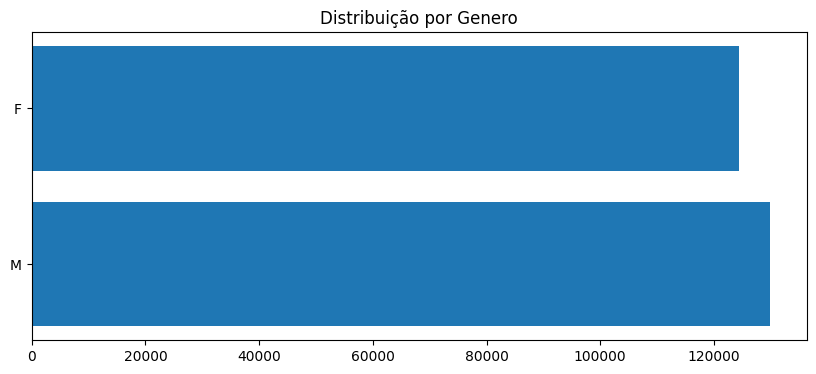

In [86]:
plt.figure(figsize=(10,4))
plt.barh(genero.index, genero.values)
plt.title('Distribuição por Genero')
plt.show()

In [89]:
print(f" A diferença entre Homens e Mulheres cadastrados na Base de dados é de {dif}")

 A diferença entre Homens e Mulheres cadastrados na Base de dados é de 5426


In [ ]:
#7) - Como estão distribuidos a questão de idade dos clientes?

In [136]:
idades = dados['age'].value_counts(ascending=False)#.reset_index()
idades.index.sort_values()

Float64Index([18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
              29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
              40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0,
              51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0,
              62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0,
              73.0, 74.0, 75.0],
             dtype='float64')

In [147]:
idades = dados['age'].value_counts(ascending=False).reset_index()
idades

,index,age
0,50.0,6791
1,36.0,5461
2,39.0,5393
3,52.0,5345
4,64.0,5224
5,18.0,5172
6,25.0,4969
7,31.0,4924
8,40.0,4898
9,69.0,4887


In [146]:
#8) - Como podemos entender o estado das vendas dos produtor da TOPSELES

In [150]:
graf_estado = dados['status'].value_counts()
graf_estado

canceled          96860
complete          88868
received          39108
order_refunded    22772
refund             3572
cod                2359
paid                474
closed              148
pending              47
payment_review       21
processing           15
pending_paypal        4
cancele               1
Name: status, dtype: int64

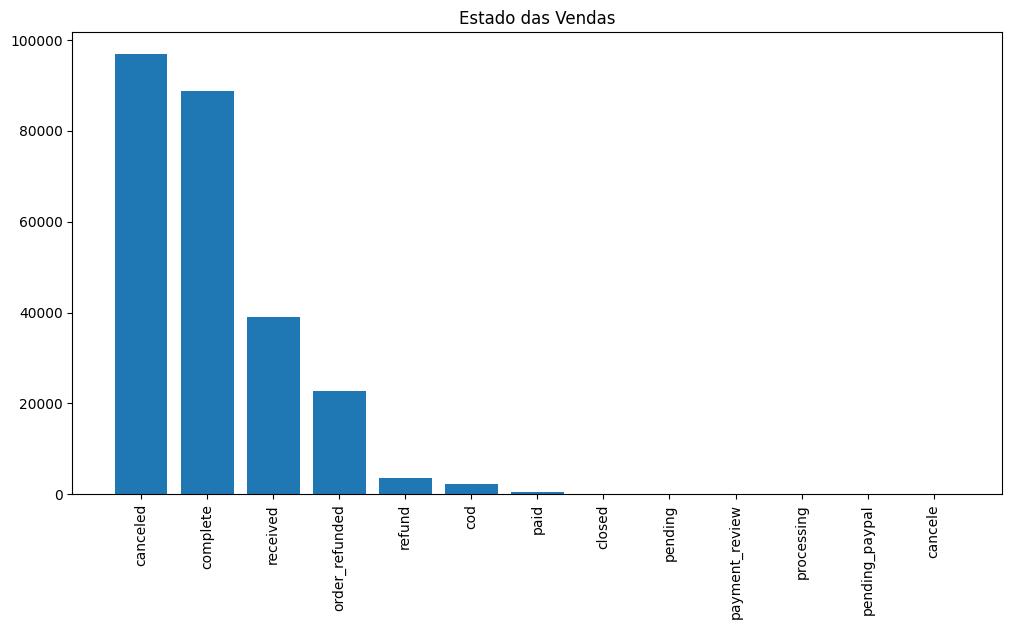

In [154]:
plt.figure(figsize=(12,6))
plt.bar(graf_estado.index, graf_estado.values)
plt.xticks(rotation=90)
plt.title('Estado das Vendas')
plt.show()

In [162]:
print(" O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:")
print(f" Staus {graf_estado.index[0]}  {graf_estado[0]}")
print(f" Staus {graf_estado.index[1]}  {graf_estado[1]}")
print(f" Staus {graf_estado.index[2]}  {graf_estado[2]}")
print(f" Staus {graf_estado.index[3]}  {graf_estado[3]}")
print(f" Staus {graf_estado.index[4]}  {graf_estado[4]}")
print(f" Staus {graf_estado.index[5]}  {graf_estado[5]}")
print(f" Staus {graf_estado.index[6]}  {graf_estado[6]}")


 O estado de compra na TOPSELES pode estar resumidos em 7 status predominantes:
 Staus canceled  96860
 Staus complete  88868
 Staus received  39108
 Staus order_refunded  22772
 Staus refund  3572
 Staus cod  2359
 Staus paid  474
